In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mysql.connector

In [2]:

customers = pd.read_csv("D:/Customers.csv", encoding='latin1')


In [4]:
customers

,CustomerKey,Gender,Name,City,State Code,State,Zip Code,Country,Continent,Birthday
0,301,Female,Lilly Harding,WANDEARAH EAST,SA,South Australia,5523,Australia,Australia,07-03-1939
1,325,Female,Madison Hull,MOUNT BUDD,WA,Western Australia,6522,Australia,Australia,9/27/1979
2,554,Female,Claire Ferres,WINJALLOK,VIC,Victoria,3380,Australia,Australia,5/26/1947
3,786,Male,Jai Poltpalingada,MIDDLE RIVER,SA,South Australia,5223,Australia,Australia,9/17/1957
4,1042,Male,Aidan Pankhurst,TAWONGA SOUTH,VIC,Victoria,3698,Australia,Australia,11/19/1965
...,...,...,...,...,...,...,...,...,...,...
15261,2099600,Female,Denisa Duková,Houston,TX,Texas,77017,United States,North America,3/25/1936
15262,2099618,Male,Justin Solórzano,Mclean,VA,Virginia,22101,United States,North America,2/16/1992
15263,2099758,Male,Svend Petrussen,Wilmington,NC,North Carolina,28405,United States,North America,11-09-1937
15264,2099862,Female,Lorenza Rush,Riverside,CA,California,92501,United States,North America,10-12-1937


In [5]:
#Data Information
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   CustomerKey  15266 non-null  int64 
 1   Gender       15266 non-null  object
 2   Name         15266 non-null  object
 3   City         15266 non-null  object
 4   State Code   15256 non-null  object
 5   State        15266 non-null  object
 6   Zip Code     15266 non-null  object
 7   Country      15266 non-null  object
 8   Continent    15266 non-null  object
 9   Birthday     15266 non-null  object
dtypes: int64(1), object(9)
memory usage: 1.2+ MB


In [6]:
#Descriptive Statistics
print("\nCustomers Descriptive Statistics:\n", customers.describe(include='all'))


Customers Descriptive Statistics:
          CustomerKey Gender        Name     City State Code       State  \
count   1.526600e+04  15266       15266    15266      15256       15266   
unique           NaN      2       15118     8258        467         512   
top              NaN   Male  John Smith  Toronto         CA  California   
freq             NaN   7748           4      204        740         715   
mean    1.060508e+06    NaN         NaN      NaN        NaN         NaN   
std     6.127097e+05    NaN         NaN      NaN        NaN         NaN   
min     3.010000e+02    NaN         NaN      NaN        NaN         NaN   
25%     5.140335e+05    NaN         NaN      NaN        NaN         NaN   
50%     1.079244e+06    NaN         NaN      NaN        NaN         NaN   
75%     1.593980e+06    NaN         NaN      NaN        NaN         NaN   
max     2.099937e+06    NaN         NaN      NaN        NaN         NaN   

       Zip Code        Country      Continent    Birthday  
cou

In [7]:
#data cleaning
#1.check for missing values
print("Missing values in Customers:\n", customers.isnull().sum())




Missing values in Customers:
 CustomerKey     0
Gender          0
Name            0
City            0
State Code     10
State           0
Zip Code        0
Country         0
Continent       0
Birthday        0
dtype: int64


In [8]:
# 1. Convert 'Birthday' to datetime format
customers['Birthday'] = pd.to_datetime(customers['Birthday'], format='%d-%m-%Y', errors='coerce')

# 2. Fill missing 'State Code' values with 'Unknown'
customers['State Code'] = customers['State Code'].fillna('Unknown')

# 3. Trim whitespace in categorical columns
for col in ['Gender', 'Name', 'City', 'State Code', 'State', 'Country', 'Continent']:
    customers[col] = customers[col].str.strip()

# 4. Ensure 'Zip Code' is treated as a string
customers['Zip Code'] = customers['Zip Code'].astype(str)

# 5. Feature engineering: Extract birth year and calculate age
customers['Birth Year'] = customers['Birthday'].dt.year
customers['Age'] = pd.Timestamp.now().year - customers['Birth Year']


In [9]:
#Check for missing values again after handling
print("Missing values in Customers after handling:\n", customers.isnull().sum())

Missing values in Customers after handling:
 CustomerKey       0
Gender            0
Name              0
City              0
State Code        0
State             0
Zip Code          0
Country           0
Continent         0
Birthday       9216
Birth Year     9216
Age            9216
dtype: int64


In [10]:
# Check how many values are still NaT after conversion
missing_birthday_count = customers['Birthday'].isnull().sum()
print(f"Missing 'Birthday' count after conversion: {missing_birthday_count}")

#entries causing issues
invalid_birthdays = customers[customers['Birthday'].isnull()]['Birthday']
print("Invalid birthday entries:\n", invalid_birthdays)

# filling missing values with a specific date (e.g., '1970-01-01')
customers['Birthday'] = customers['Birthday'].fillna(pd.to_datetime('1970-01-01'))

# Recalculating 'Birth Year' and 'Age'
customers['Birth Year'] = customers['Birthday'].dt.year
customers['Age'] = pd.Timestamp.now().year - customers['Birth Year']

# Displaying the counts of missing values after handling
print("Missing values in Customers after handling:\n", customers.isnull().sum())

# Print unique values in 'Birthday' to check the filled values
print("Unique values in 'Birthday':\n", customers['Birthday'].unique())


Missing 'Birthday' count after conversion: 9216
Invalid birthday entries:
 1       NaT
2       NaT
3       NaT
4       NaT
5       NaT
         ..
15259   NaT
15260   NaT
15261   NaT
15262   NaT
15265   NaT
Name: Birthday, Length: 9216, dtype: datetime64[ns]
Missing values in Customers after handling:
 CustomerKey    0
Gender         0
Name           0
City           0
State Code     0
State          0
Zip Code       0
Country        0
Continent      0
Birthday       0
Birth Year     0
Age            0
dtype: int64
Unique values in 'Birthday':
 <DatetimeArray>
['1939-03-07 00:00:00', '1970-01-01 00:00:00', '1950-12-03 00:00:00',
 '1990-12-08 00:00:00', '1965-03-03 00:00:00', '1986-10-07 00:00:00',
 '1968-01-04 00:00:00', '1995-08-04 00:00:00', '2000-08-11 00:00:00',
 '1948-02-05 00:00:00',
 ...
 '1954-10-08 00:00:00', '1941-02-06 00:00:00', '1995-09-06 00:00:00',
 '2001-09-09 00:00:00', '1993-04-06 00:00:00', '1965-06-05 00:00:00',
 '1937-09-10 00:00:00', '1987-02-11 00:00:00', '1971-0

In [11]:
print(customers.info())
print(customers.head())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15266 entries, 0 to 15265
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   CustomerKey  15266 non-null  int64         
 1   Gender       15266 non-null  object        
 2   Name         15266 non-null  object        
 3   City         15266 non-null  object        
 4   State Code   15266 non-null  object        
 5   State        15266 non-null  object        
 6   Zip Code     15266 non-null  object        
 7   Country      15266 non-null  object        
 8   Continent    15266 non-null  object        
 9   Birthday     15266 non-null  datetime64[ns]
 10  Birth Year   15266 non-null  int32         
 11  Age          15266 non-null  int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(8)
memory usage: 1.3+ MB
None
   CustomerKey  Gender               Name            City State Code  \
0          301  Female      Lilly Harding  WANDEA

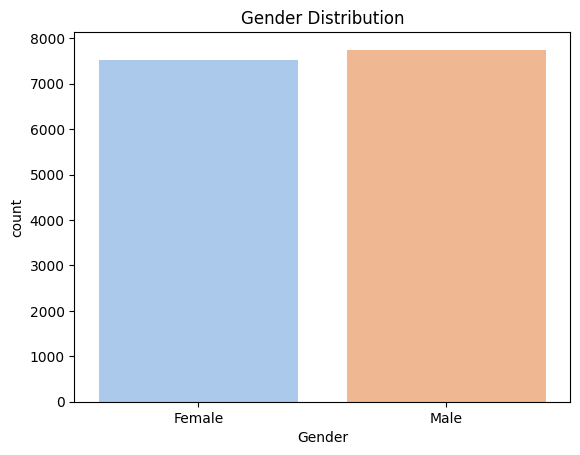

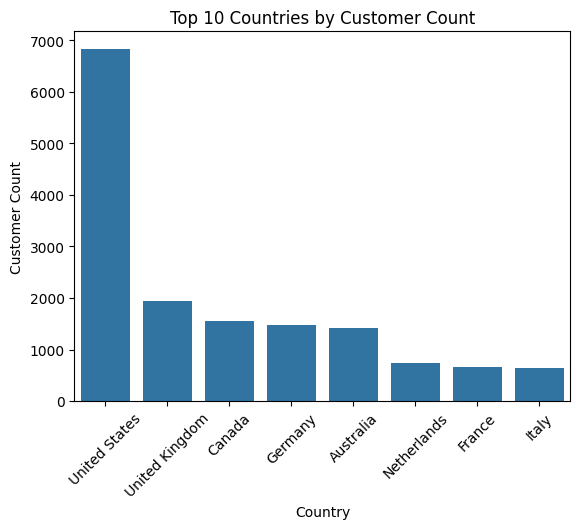

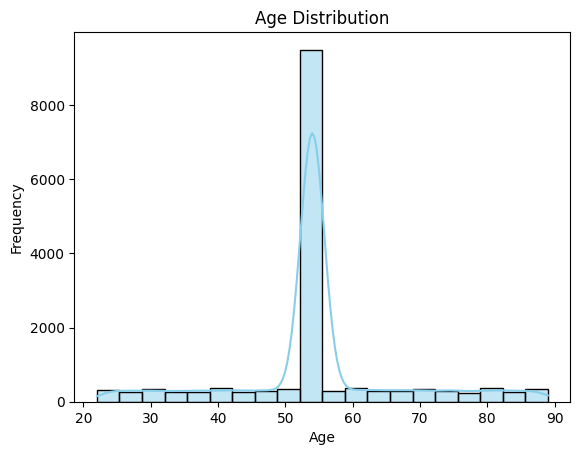

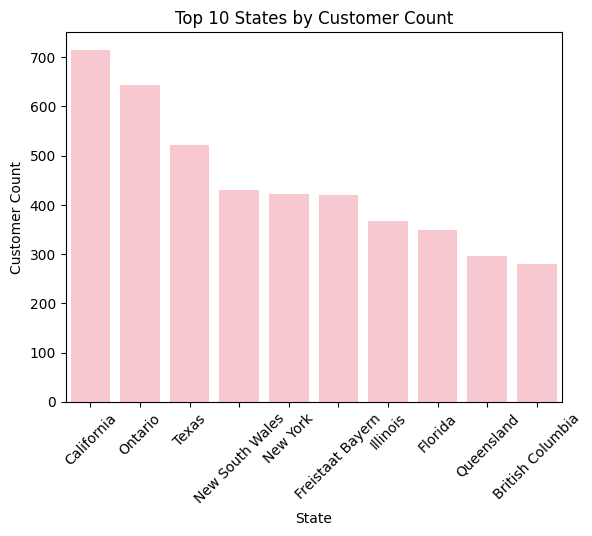

In [12]:
#Visualization
# Gender Distribution
plt.figure()
sns.countplot(x='Gender', data=customers, palette='pastel', hue='Gender', legend=False)
plt.title("Gender Distribution")
plt.show()

# Country Distribution (Top 10 countries)
plt.figure()
top_countries = customers['Country'].value_counts().nlargest(10)
sns.barplot(x=top_countries.index, y=top_countries.values)  # Removed palette parameter
plt.title("Top 10 Countries by Customer Count")
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Customer Count")
plt.show()

# Age Distribution
plt.figure()
sns.histplot(customers['Age'], bins=20, kde=True, color='skyblue')  # Removed palette parameter
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

# State Distribution (Top 10 states)
plt.figure()
top_states = customers['State'].value_counts().nlargest(10)
sns.barplot(x=top_states.index, y=top_states.values, color='pink')  # Kept palette for state distribution
plt.title("Top 10 States by Customer Count")
plt.xticks(rotation=45)
plt.xlabel("State")
plt.ylabel("Customer Count")
plt.show()


In [14]:
# Connect to the MySQL database
db_connection = mysql.connector.connect(
    host="localhost",
    user="root",
    password="3008",
    database="global_electronics"
)

cursor = db_connection.cursor()

# Create table if it doesn't exist
cursor.execute('''
    CREATE TABLE IF NOT EXISTS Customers (
        CustomerKey INT PRIMARY KEY,
        Gender VARCHAR(50),
        Name VARCHAR(255),
        City VARCHAR(255),
        StateCode VARCHAR(50),
        State VARCHAR(255),
        ZipCode VARCHAR(20),
        Country VARCHAR(255),
        Continent VARCHAR(255),
        Birthday DATE,
        BirthYear INT, 
        Age INT            
    );
''')

# Convert each row of the DataFrame to a tuple for SQL insertion
rows_to_insert = [tuple(row) for row in customers.values]

# Set batch size for insertion
batch_size = 500  

# Insert data in batches using INSERT IGNORE to skip duplicates
for start in range(0, len(rows_to_insert), batch_size):
    batch = rows_to_insert[start:start + batch_size]
    
    try:
        # Insert the batch into the Customers table, ignoring duplicates
        cursor.executemany('''
            INSERT IGNORE INTO Customers (CustomerKey, Gender, Name, City, StateCode, State, ZipCode, Country, Continent, Birthday,  BirthYear, Age )
            VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
        ''', batch)
        db_connection.commit()
    except mysql.connector.Error as err:
        # Rollback in case of error, to keep the database consistent
        print(f"Error in batch {start // batch_size + 1}: {err}")
        db_connection.rollback()

# Confirm successful insertions by counting rows in the table
cursor.execute("SELECT COUNT(*) FROM Customers")
row_count = cursor.fetchone()[0]
print(f"Total customers inserted: {row_count}")

# Close the cursor and database connection
cursor.close()
db_connection.close()


Total customers inserted: 15266
